In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
test_data = pd.read_csv("test_iris.csv", header=None, sep=' ', names=['sepal_length', 'sepal_width', 'petal_width','petal_length'])

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

In [65]:
class KMeans():
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, n_runs=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_runs = n_runs
        self.cluster_labels = None
        self.best_cluster_labels = None
        self.best_inertia = None
        
    def initialize_centroids(self, X):
        centroid_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X.iloc[centroid_indices].values
        return centroids
    
    def compute_distances(self, X, centroids):
        # Compute cosine similarity between samples and centroids
        cos_sim = np.dot(X.values, centroids.T) / (np.linalg.norm(X.values, axis=1)[:, np.newaxis] * np.linalg.norm(centroids, axis=1))
        # Convert cosine similarity to cosine distance
        distances = 1 - cos_sim
        return distances
    
    def assign_clusters(self, X, centroids):
        distances = self.compute_distances(X, centroids)
        cluster_labels = np.argmin(distances, axis=1)
        return cluster_labels
    
    def update_centroids(self, X, cluster_labels):
        centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids
    
    def fit(self, X):
        all_cluster_labels = []
        all_inertias = []
        for i in range(self.n_runs):
            self.centroids = self.initialize_centroids(X)
            for i in range(self.max_iter):
                initial_centroids = self.centroids.copy()
                cluster_labels = self.assign_clusters(X, self.centroids)
                self.centroids = self.update_centroids(X, cluster_labels)
                change_in_centroids = np.sqrt(np.sum((self.centroids - initial_centroids) ** 2, axis=1))

                # check for convergence
                if np.max(change_in_centroids) < self.tol:
                    break
            all_cluster_labels.append(cluster_labels)
            # Calculate inertia for the current run
            inertia = np.sum([np.sum(np.linalg.norm(X[cluster_labels == k] - self.centroids[k], axis=1)**2) for k in range(self.n_clusters)])
            all_inertias.append(inertia)

        # Pick the best cluster labels based on the lowest inertia
        best_run_idx = np.argmin(all_inertias)
        self.cluster_labels = np.array(all_cluster_labels)
        self.best_cluster_labels = self.cluster_labels[best_run_idx]
        self.best_inertia = all_inertias[best_run_idx]
        return self.best_cluster_labels, self.best_inertia


In [62]:
all_labels=[]
best_inertias=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    labels, best_inertia= km.fit(test_data)
    all_labels.append(labels)
    best_inertias.append(best_inertia)

In [63]:
best_inertias

[680.8244,
 155.03640000000001,
 92.07870917874396,
 88.70480917874397,
 85.29735967190706,
 77.21635602789024,
 76.24044064327487,
 72.48533735517356,
 71.00603973612596,
 69.72666709348591,
 68.72383745739124,
 68.54925140056022,
 66.40308923266277,
 64.39639073061443,
 61.925507533316356,
 63.62473412698414,
 63.327969654528495,
 63.240388888888894,
 60.76126587301589,
 60.95995707070708]

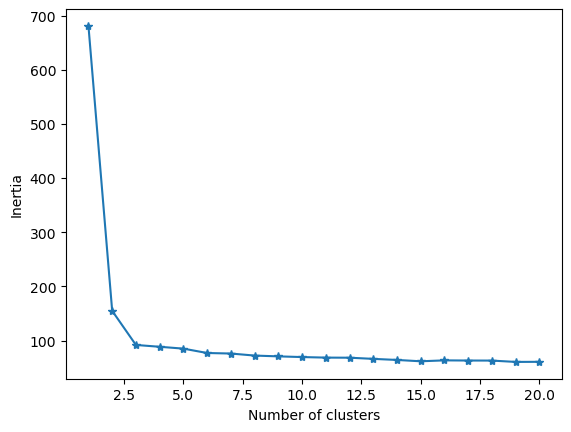

In [66]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), best_inertias, marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4, n_runs=50)
predictions = kmeans.fit(test_data)

In [29]:
predictions = pd.DataFrame(predictions)
predictions = predictions.replace({0:1, 1:2, 2:3})
print(predictions)

     0
0    3
1    3
2    3
3    3
4    3
..  ..
145  3
146  2
147  1
148  1
149  1

[150 rows x 1 columns]


In [30]:
predictions.to_csv('pred20.csv', index=False, header=False, escapechar=None)

In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(test_data)
pred = kmeans.predict(test_data)
pred = pd.DataFrame(pred)
pred = pred.replace({0:1, 1:2, 2:3})

In [135]:
pred.to_csv('pred_sklearn.csv', index=False, header=False, escapechar=None)